In [1]:
import os
from pybedtools import BedTool
import pandas as pd
import seaborn as sns
from pathlib import Path
outdir = Path('/home/hsher/scratch/circ_de/output/')


In [2]:
rename_dict = {'HEK_JC_rar11':'rar11_JC_rep2', 
               'Exo05': 'Exo05', 
               'Exo10': 'Exo10',
               'HEK_rar11': 'rar11_rep2', 
               'EV_rar11': 'rar11_rep2-EV', 
               'TOB2_rar11': 'rar11_rep2-TOB2',
               'EV_rz': 'rz-EV', 
               'HEK_rar': 'rar_rep2', 
               'TOB2_rz': 'rz-TOB2', 
               'HEK_JC_rar': 'rar_JC', 
               'RBM15_rz': 'rz-RBM15',
               'circseq-bm-rar19-nxt': 'rar19', 
               'circseq-bm-rar11-nxt': 'rar11_rep1', 
               'circseq-bm-rar': 'rar_rep1',
               'circseq-bm-arr': 'arr', 
               'circseq-bm-rz': 'rz_rep1', 
               'APO-50-A': 'polyA-APO-50', 
               'APO-50-R': 'RNase-APO-50', 
               'HuR-noD-A': 'polyA-HuR-0',
               'HuR-50-R': 'RNase-HuR-0', 
               'HuR-1-A': 'polyA-HuR-1000', 
               'APO-noD-R': 'RNase-APO-0', 
               'HuR-1-R': 'RNase-HuR-1000', 
               'APO-1-R': 'RNase-APO-1000',
               'APO-noD-A': 'polyA-APO-0'}

In [3]:
group_color = {'rar11_JC': 'tomato',
              'rar11_rep1': 'orange',
               'rar11_rep2': 'orange',
              
              'rz': 'mediumorchid', 
               'rar_rep1': 'seagreen',
              'rar_rep2': 'seagreen',
              'rar_JC': 'limegreen',
              'arr': 'royalblue'}

In [4]:
import matplotlib.pyplot as plt
def compare_de(sample_name):
    adj_f = outdir/'adjusted_comparison'/f'{sample_name}.gtf.tsv'
    unadj_f = outdir/'unadjusted_comparison'/f'{sample_name}.gtf.tsv'
    
    adj_df = pd.read_csv(adj_f, sep = '\t')
    unadj_df = pd.read_csv(unadj_f, sep = '\t')
    name = rename_dict[sample_name.split('.')[0]]
    
    adj_df.merge(unadj_df, left_on = 'circRNA_ID', right_on = 'circRNA_ID')
    
    return adj_df.merge(unadj_df, left_on = 'circRNA_ID', right_on = 'circRNA_ID', 
                       suffixes = ('_adjust', '_unadjust'))

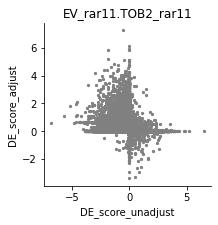

In [6]:
sample = 'EV_rar11.TOB2_rar11'
df = compare_de(sample)
df.plot.scatter(x = 'DE_score_unadjust', y = 'DE_score_adjust', figsize = (3,3), marker = '.', 
               color = 'grey')
plt.title(sample)
sns.despine()

In [22]:
df

,circRNA_ID,Case_BSJ_adjust,Case_FSJ_adjust,Case_Ratio_adjust,Ctrl_BSJ_adjust,Ctrl_FSJ_adjust,Ctrl_Ratio_adjust,DE_score_adjust,DS_score_adjust,Case_BSJ_unadjust,Case_FSJ_unadjust,Case_Ratio_unadjust,Ctrl_BSJ_unadjust,Ctrl_FSJ_unadjust,Ctrl_Ratio_unadjust,DE_score_unadjust,DS_score_unadjust
0,chr2:38802715|38843164,0,0,0.000,0,120,0.014,0.000000,None,0,0,0.000,2,12,0.250,0.000000,0.000000
1,chr1:193203795|193249871,1,388,0.005,1,391,0.005,0.000000,None,5,6,0.625,0,0,0.000,0.000000,0.000000
2,chrX:129994337|130025102,0,77,0.008,0,0,0.000,0.000000,None,2,16,0.200,0,0,0.000,0.000000,0.000000
3,chr2:135120819|135153876,0,250,0.003,0,0,0.000,0.000000,None,2,37,0.098,0,0,0.000,0.000000,0.000000
4,chr17:80135313|80138280,0,0,1.000,0,0,0.000,0.000000,None,2,0,1.000,0,0,0.000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35942,chr15:55915284|55916911,0,0,0.000,0,0,1.000,0.000000,None,0,0,0.000,5,0,1.000,0.000000,0.000000
35943,chr22:41330023|41339191,0,0,0.000,0,389,0.001,0.000000,None,0,0,0.000,6,412,0.028,-0.064429,1.825138
35944,chr20:35926717|35927879,0,1,0.008,0,0,0.000,0.000000,None,2,16,0.200,0,0,0.000,0.000000,0.000000
35945,chr2:222900674|222909150,25,585,0.080,0,0,0.000,-0.864853,None,25,18,0.735,0,0,0.000,2.452566,0.000000


<AxesSubplot:xlabel='Case_BSJ_unadjust', ylabel='Case_BSJ_adjust'>

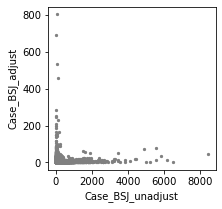

In [7]:
df.plot.scatter(x = 'Case_BSJ_unadjust', y = 'Case_BSJ_adjust', figsize = (3,3), marker = '.', 
               color = 'grey')

<AxesSubplot:xlabel='Case_FSJ_unadjust', ylabel='Case_FSJ_adjust'>

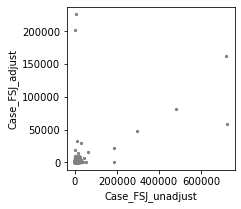

In [8]:
df.plot.scatter(x = 'Case_FSJ_unadjust', y = 'Case_FSJ_adjust', figsize = (3,3), marker = '.', 
               color = 'grey')

<AxesSubplot:xlabel='Case_Ratio_unadjust', ylabel='Case_Ratio_adjust'>

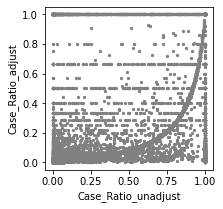

In [9]:
df.plot.scatter(x = 'Case_Ratio_unadjust', y = 'Case_Ratio_adjust', figsize = (3,3), marker = '.', 
               color = 'grey')

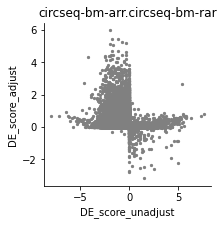

In [11]:
sample = 'circseq-bm-arr.circseq-bm-rar'
df = compare_de(sample)
df.plot.scatter(x = 'DE_score_unadjust', y = 'DE_score_adjust', figsize = (3,3), marker = '.', 
               color = 'grey')
plt.title(sample)
sns.despine()

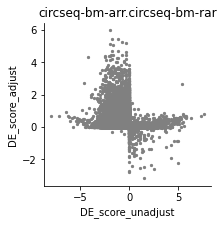

In [13]:
sample = 'circseq-bm-arr.circseq-bm-rar'
df = compare_de(sample)
df.plot.scatter(x = 'DE_score_unadjust', y = 'DE_score_adjust', figsize = (3,3), marker = '.', 
               color = 'grey')
plt.title(sample)
sns.despine()

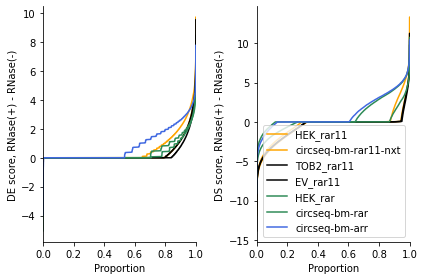

In [21]:

# control = RNase+
# case = RNnase-
f, ax = plt.subplots(1,2, sharex = True, figsize = (6,4))
de_outputs = (outdir/ 'compare_to_rz').glob('*.tsv')

for i,f in enumerate(de_outputs):
    de_df = pd.read_csv(f, sep = '\t')
    name = f.name.split('.')[0]
    try:
        color = group_color[rename_dict[name]]
    except:
        color = 'black'
    
    sns.ecdfplot(de_df, y = 'DE_score', color = color, ax = ax[0], label = name)
    sns.ecdfplot(de_df, y = 'DS_score', color = color, ax = ax[1], label = name)
    
ax[0].set_ylabel('DE score, RNase(+) - RNase(-)')
ax[1].set_ylabel('DS score, RNase(+) - RNase(-)')

plt.legend()
sns.despine()
plt.tight_layout()